# COSC 3337 Project Report
## Custom CNN for classifying images on the CIFAR10 Dataset using the Keras python library

### Questions this NoteBook will be answering:
##### 1. Custom CNN code for classifying images on the CIFAR10 Dataset
##### 2. What is Transfer Learning?
##### 3. How our trained model perform on new images not on our dataset?
##### 4. What does it predict when you give the model an object that is not one of the 10 classes?
##### 5. Summary: Hyperparameters and Accuracy
##### 6. Why CIFAR10 Dataset? 
##### 7. Why Keras?






### Why CIFAR10 Dataset? 

CIFAR10 is a very common dataset for beguinners trying to understand the basis of Artificial Neural Networks and Convolutional Neural Networks. It contains 60k images, and even though it could seem a little but difficult, there are many resources online that can help us understand this dataset better; this is a very popular dataset and famous in the Data Science community. 
A good thing this dataset has is that all images are compressed to facilitate our use of them, because they take on less space. 
The other advantage is that is comes inside the Keras library as one of their many data sets, which makes it convenient for us to use.

### Why Keras?

We decided to try the Keras framework for its slow learning curve. It is very easy to understand, once you know the core components of the models used. We'll be using the keras library provided by the tensorflow platform.

`tensorflow.keras`



In [ ]:
# Let's install and import our dataset to use in our training

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test)=cifar10.load_data()


170508288/170498071 [==============================] - 2s 0us/step


We can see here the size of our dataset. Keras provides a simple way to divide our data randomnly in trainX, trainY, testX, testY

### Normalization of the Data

When using deep learning packages is always a good idea to pre-process and normalize the data before attempting to train the models. This means that we are mapping all values to a easier to work scale of [0,1]

Why do we normalize the data? The model will be faster at the end, and we'll have more accurate results. This would be the equivalent of scaling our data before the training process

Most machine learning algorithms require us to input numerical variables and fields. In our case we are using 10 categories, that is why there exists a method called One Hot Encoding. This will convert all categorical data into integer for easy use of our ML algorithms. 

Why do we use One Hot Encoding? If we forgo this step we may obtain poor performance and strange results, where the model will classify a class a 0.5 and not give an accurate result.

[More Information](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

In [ ]:
## Normalizing
X_train=x_train/255
X_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

### Importing All Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

### Training Process

We decided to try out a custom training model that uses Convutional Neural Networks as its base.

CNN's are one of the best methods to build an image classifier.

Here we can see an example of the architecture we will use in this Notebook

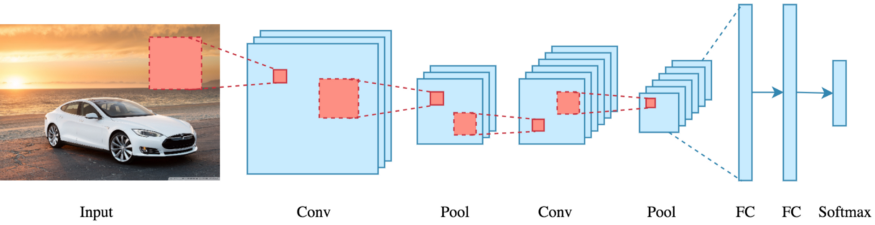

### Techniques to improve accuracy 

#### Drop Out

With this technique we are telling the neural network to drop some neural units at random from our network. This will make the network to re-learn some patterns increasing robustness and accuracy.

#### Adding More Layers

By increasing the number of layers the accuracy will also see an improvement, but it's not always to increase the number of layers to too many as it could damage our CNN. 

> Any of these 2 techniques can be tweak to improve our model; including increasing the number of epochs

#### Batch Normalization

This is another technique to enhance our network. This was explained on the normalization of the data. We repeat this process so thath the model actually converges. This will make our model even more stable.

The specific type of normalization used in this example is batch normalization: We compute the mean and variance of each mini batch and not the whole data.

#### Image Augmentation

And lastly, the other way to improve our model is to use data augmentation to avoid overfitting our data. We change the images position, inclanation, zoom, color, focus, and other techniques to generate more images from a single one. This technique actually helps the computer to realize that an image is actually what the image is, no matter where it is located.


In [ ]:
rlr = ReduceLROnPlateau(monitor='val_accuracy', mode ='max', factor=0.5, min_lr=1e-7, verbose = 1, patience=10)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose = 1, patience=50, restore_best_weights=True)
mc = ModelCheckpoint('cnn_best_model.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only=True)
callback_list = [rlr, es, mc]

def build_model(lr = 0, dc = 0, dr = 0):
    model = Sequential(name = 'CNN_cifar10')
    model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_uniform', kernel_regularizer=regularizers.l2(1e-4), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(256, activation='elu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(dr))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = optimizers.Adam(lr = lr, decay = dc)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = build_model(lr = 0.001, dc = 1e-5, dr = 0.5)

#data augmentation
datagen = ImageDataGenerator(
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False
                            )
datagen.fit(X_train)

# run model
model.fit_generator(datagen.flow(X_train, y_train_cat, batch_size = 64),
                                 validation_data = (X_test, y_test_cat),
                                 steps_per_epoch = X_train.shape[0] // 64, 
                                 epochs = 40, verbose = 1,
                                 callbacks = callback_list)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
781/781 [==============================] - 508s 648ms/step - loss: 1.8394 - accuracy: 0.4113 - val_loss: 1.4508 - val_accuracy: 0.5243

Epoch 00001: val_accuracy improved from -inf to 0.52430, saving model to cnn_best_model.h5
Epoch 2/40
781/781 [==============================] - 503s 645ms/step - loss: 1.3237 - accuracy: 0.5601 - val_loss: 1.1637 - val_accuracy: 0.6315

Epoch 00002: val_accuracy improved from 0.52430 to 0.63150, saving model to cnn_best_model.h5
Epoch 3/40
781/781 [==============================] - 500s 640ms/step - loss: 1.1451 - accuracy: 0.6292 - val_loss: 1.1011 - val_accuracy: 0.6567

Epoch 00003: val_accuracy improved from 0.63150 to 0.65670, saving model to cnn_best_model.h5
Epoch 4/40
781/781 [==============================] - 499s 639ms/step - loss: 1.0433 - accuracy: 0.6675 - val_loss: 0.9897 - val_accuracy: 0.6944

Epoch 00004: val_accuracy improved from 0.65670 to 0.69440, saving model to cnn_best_model.h5
Epoch 5/40
781/781 [===================

In [ ]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.2))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPool2D((2, 2)))
model6.add(Dropout(0.4))
model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))
# compile model
# opt = SGD(lr=0.001, momentum=0.9)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Image Data Generator , we are shifting image accross width and height also we are flipping the image horizantally.
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,rotation_range=20)
it_train = datagen.flow(X_train,y_train_cat)
steps = int(X_train.shape[0] / 64)
history6=model6.fit_generator(it_train,epochs=40,steps_per_epoch=steps,validation_data=(x_test,y_test_cat))

evaluation = model6.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
781/781 [==============================] - 255s 324ms/step - loss: 1.9637 - accuracy: 0.3338 - val_loss: 594.9306 - val_accuracy: 0.1659
Epoch 2/40
781/781 [==============================] - 253s 323ms/step - loss: 1.4969 - accuracy: 0.4594 - val_loss: 645.2262 - val_accuracy: 0.1544
Epoch 3/40
781/781 [==============================] - 252s 322ms/step - loss: 1.3313 - accuracy: 0.5233 - val_loss: 848.9339 - val_accuracy: 0.1498
Epoch 4/40
781/781 [==============================] - 253s 323ms/step - loss: 1.2235 - accuracy: 0.5673 - val_loss: 362.9290 - val_accuracy: 0.2312
Epoch 5/40
781/781 [==============================] - 253s 324ms/step - loss: 1.1408 - accuracy: 0.5988 - val_loss: 419.5992 - val_accuracy: 0.1326
Epoch 6/40
781/781 [==============================] - 254s 325ms/step - loss: 1.0675 - accuracy: 0.6263 - val_loss: 234.6855 - val_accuracy: 0.2570
Epoch 7/40
781/781 [==============================] - 254s 325ms/step - loss: 1.0177 - accuracy: 0.6464 - val_lo

In [ ]:
def plot_model(history): 
    fig, axs = plt.subplots(1,2,figsize=(16,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy'], 'c') 
    axs[0].plot(history.history['val_accuracy'],'m') 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'], 'c') 
    axs[1].plot(history.history['val_loss'], 'm') 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper right')
    plt.show()

plot_model(history6)

NameError: ignored